In [ ]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.under_sampling import RandomUnderSampler


from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
import re

from textblob import TextBlob 

In [742]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4') 

[nltk_data] Downloading package wordnet to C:\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [743]:
# loading the dataset
df = pd.read_csv('Datasets/Tweets.csv')

In [744]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [745]:
# Let's check the target value 
df['airline_sentiment'].value_counts()

airline_sentiment
negative    9178
neutral     3099
positive    2363
Name: count, dtype: int64

In [746]:
# Drop the columns 
df = df.drop(['tweet_id', 'airline_sentiment_confidence', 'negativereason', 'negativereason_confidence', 'airline', 'airline_sentiment_gold', 'name', 'negativereason_gold', 'retweet_count', 'tweet_coord', 'tweet_created', 'tweet_location', 'user_timezone'], axis=1)

In [747]:
df.head(20)

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...
5,negative,@VirginAmerica seriously would pay $30 a fligh...
6,positive,"@VirginAmerica yes, nearly every time I fly VX..."
7,neutral,@VirginAmerica Really missed a prime opportuni...
8,positive,"@virginamerica Well, I didn't…but NOW I DO! :-D"
9,positive,"@VirginAmerica it was amazing, and arrived an ..."


### Preprocessing

In [748]:
def clean_text(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text)
    text = re.sub(r'#', '', text)
    text = re.sub(r'RT[\s]+', '', text)
    text = re.sub(r'htt?:\/\/\S+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = text.lower()
    text = re.sub(r'\s+', ' ', text)
    text  = re.sub(r'\d', '', text) 
                  
    return text

df['text'] = df['text'].apply(clean_text)

In [749]:
stop_words = set(stopwords.words('english'))
df['text'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

In [750]:
# Lemmatization
lemmatizer = WordNetLemmatizer()
df['text'] = df['text'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))

In [751]:
df.head(20)

,airline_sentiment,text
0,neutral,said
1,positive,plus youve added commercial experience tacky
2,neutral,didnt today must mean need take another trip
3,negative,really aggressive blast obnoxious entertainmen...
4,negative,really big bad thing
5,negative,seriously would pay flight seat didnt playing ...
6,positive,yes nearly every time fly vx ear worm wont go ...
7,neutral,really missed prime opportunity men without ha...
8,positive,well didntbut
9,positive,amazing arrived hour early youre good


In [752]:
# check the null values
df.isnull().sum()

airline_sentiment    0
text                 0
dtype: int64

In [754]:
df['airline_sentiment'].value_counts()   

airline_sentiment
negative    9178
neutral     3099
positive    2363
Name: count, dtype: int64

In [ ]:
# save the cleaned data
df.to_csv('Datasets/cleaned_tweets.csv', index=False)

In [756]:
X = df['text']  
y = df['airline_sentiment']

In [757]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(X)

In [ ]:
# Create a RandomUnderSampler object
rus = RandomUnderSampler(random_state=0)   
X, y = rus.fit_resample(X, y)

In [759]:
y.value_counts()

airline_sentiment
negative    2363
neutral     2363
positive    2363
Name: count, dtype: int64

In [760]:
 # train/test -split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)    

In [761]:
y.value_counts()

airline_sentiment
negative    2363
neutral     2363
positive    2363
Name: count, dtype: int64

In [762]:
model = MultinomialNB()

In [763]:
param_grid = {
    'alpha': [0.001, 0.01, 0.1, 0.25, 0.5, 0.75, 1.0, 5.0],
    'fit_prior': [True, False]  
}


# Configure and run grid search
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='accuracy',   
    cv=5,                 
    n_jobs=-1,            
    verbose=1             
)
grid_search.fit(X_train, y_train)
# Best parameters and best model
best_model = grid_search.best_estimator_
print("Best parameters:", grid_search.best_params_)


Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best parameters: {'alpha': 0.5, 'fit_prior': True}


In [764]:
model = MultinomialNB(alpha=0.5, fit_prior=True)             

model.fit(X_train, y_train)

MultinomialNB(alpha=0.5)

In [765]:
 # test predictions for metrics later
predictions = model.predict(X_test)

In [766]:
# accuracies etc.
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

    negative       0.69      0.82      0.75       469
     neutral       0.73      0.59      0.65       472
    positive       0.77      0.77      0.77       477

    accuracy                           0.73      1418
   macro avg       0.73      0.73      0.72      1418
weighted avg       0.73      0.73      0.72      1418



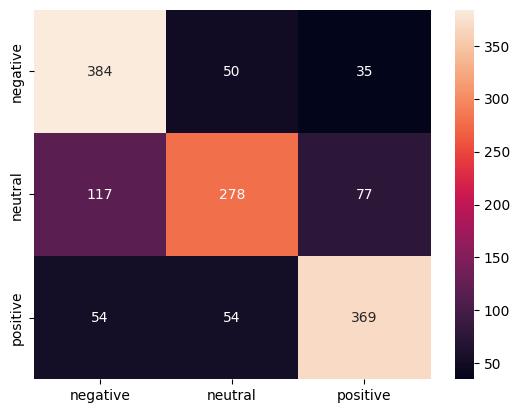

In [767]:
cm = confusion_matrix(y_test, predictions, labels=model.classes_)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=model.classes_, yticklabels=model.classes_)
plt.show()

In [768]:
 # switch to decimal format
np.set_printoptions(precision=8, suppress=True)

In [769]:
sample_message = [' seriously would payling  a flight for seats that didnt have this playing its really the only bad thing about flying']

In [770]:
sample_message = TextBlob(sample_message[0]).correct().string
print(sample_message)

 seriously would paying  a flight for seats that didn have this playing its really the only bad thing about flying


In [771]:
# vectorize the new messages and predict the values
processed_text = vectorizer.transform([sample_message])
results = model.predict_proba(processed_text)

In [772]:
print('Results:')
print()

# Define labels using the classes from the model
labels = model.classes_

# amount of the test messages above
amount = len(results)

# loop through each message
for index in range(amount):
	row = results[index]
	result = np.argmax(row)
	result_text = labels[result]

	print()
	print(sample_message)
	print(row.astype(float))
	print(result_text)
	print()

Results:


 seriously would paying  a flight for seats that didn have this playing its really the only bad thing about flying
[0.93634584 0.0030607  0.06059346]
negative

